# Step by step ML guide - classification
Analog to the and inspired by the fantastic book [`Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition`](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/) by Aurélien Géron!
* This jupyter notebook is based on `Chapter 3 – Classification` of the above mentioned book. The original jupyter notebook can be found [`here`](https://github.com/ageron/handson-ml2).

## Scikit-Learn & Python
This notebook is done with **scikit-learn version 0.21.3** and **Python 3.7.5**. See also the [`API Reference`](https://scikit-learn.org/stable/modules/classes.html) of scikit-learn.

## Setup

#### Use operating system dependent functionality
[`os`](https://docs.python.org/3/library/os.html) provides a portable way of using operating system dependent functionality

In [105]:
import os

[`numpy`](http://www.numpy.org/) is the fundamental package for scientific computing with Python.
<br>
[`pandas`](https://pandas.pydata.org/pandas-docs/stable/#module-pandas) providing high-performance, easy-to-use data structures and data analysis tools.

In [106]:
import numpy as np
import pandas as pd

#### Ploting figures
[`matplotlib`](https://matplotlib.org/) for plotting functions - use `%matplotlib inline` to plot the figures inline (inside the notebook)

In [107]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

Set the number of CPUs to be used by to the parameter `n_jobs`.

In [108]:
# set tne numbers of processors to be used
# value 1 -> use 1 CPU
# value 2 -> use 2 CPUs ...
# value -1 -> use all CPUs
# value -2 -> use all but one CPU ...
n_cpus = -2

### Get the MNIST data set
Fetch the MNIST dataset by using [`fetch_openml`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html). 

In [109]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

Display the downloaded `MNIST` dataset. Use the serult of `mnist.keys` to focus on the different parts. 

In [110]:
mnist['details']

{'id': '554',
 'name': 'mnist_784',
 'version': '1',
 'format': 'ARFF',
 'upload_date': '2014-09-29T03:28:38',
 'licence': 'Public',
 'url': 'https://www.openml.org/data/v1/download/52667/mnist_784.arff',
 'file_id': '52667',
 'default_target_attribute': 'class',
 'tag': ['AzurePilot',
  'OpenML-CC18',
  'OpenML100',
  'study_1',
  'study_123',
  'study_41',
  'study_99',
  'vision'],
 'visibility': 'public',
 'status': 'active',
 'processing_date': '2018-10-03 21:23:30',
 'md5_checksum': '0298d579eb1b86163de7723944c7e495'}

In [111]:
X, y = mnist['data'], mnist['target']

In [112]:
X.shape

(70000, 784)

In [113]:
y.shape

(70000,)

Plotting function for the images / figures

In [114]:
def plot_digit(data):
    data_reshaped = data.reshape(28,28)
    
    plt.imshow(data_reshaped, cmap='binary')
    #plt.imshow(data_reshapedS)
    plt.axis('off')
    plt.show()

Plot the first digit:

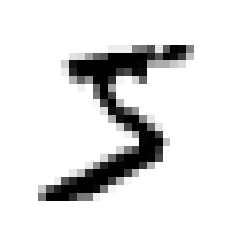

In [129]:
some_digit = X[0]
plot_digit(some_digit)

Plot the label of the first image:

In [116]:
y[0]

'5'

In [117]:
type(y[0])

str

Convert the labels from type `string` into type `int`.

In [118]:
y = y.astype(np.uint8)
y[0]

5

In [119]:
type(y[0])

numpy.uint8

### Split the data into a training and a test set
The MNIST dataset has been already split into a training set (the first 60.000 entries) and a test set (the last 10.000 entries) 

In [120]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [121]:
X_train.shape

(60000, 784)

## Binary classifier
A binary classifier distinguishes between two classes. In this example between the values 5 and not-5.<br>
Create a target vector for this classification task ( 5 and not-5).

In [122]:
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits
y_test_5 = (y_test == 5) # True for all 5s, False for all other digits
y_train_5, y_train # print both arrays

(array([ True, False, False, ...,  True, False, False]),
 array([5, 0, 4, ..., 5, 6, 8], dtype=uint8))

Use the [`Stochastic Gradient Decent (SGD)`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier) classifier.

In [124]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42, n_jobs=n_cpus)

sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-2, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [130]:
sgd_clf.predict([some_digit])

array([ True])

### Performance measurement
Do a first performance measurement with [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score). `cross_val_score` evaluates a score for each cross validation step. In the example below, there will be 3 scores for the 3 cross validation steps.

In [134]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, n_jobs=n_cpus, 
                cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])